In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)

In [2]:
def func(x):
    return np.sqrt(np.cos(x)**2+1)

In [3]:
num_darts = 1000
xbounds = [0,2]
random_x = np.random.uniform(*xbounds, size=num_darts)
                             
ybounds = [0, 1.5]
random_y = np.random.uniform(*ybounds, size=num_darts)

In [4]:
x = np.linspace(0, 2, num_darts)

In [5]:
y_hat = func(random_x)

In [6]:
y_below = random_y < y_hat

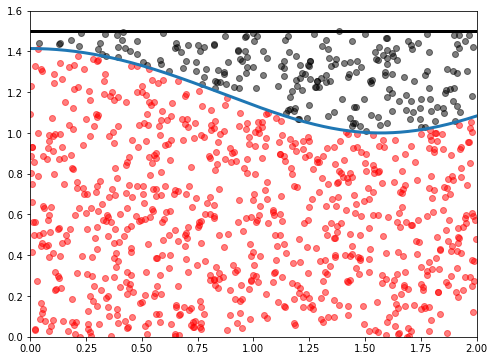

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(random_x[~y_below], random_y[~y_below], "ko", alpha=.5)
ax.plot(random_x[y_below], random_y[y_below], "ro", alpha=.5)
ax.plot(x, func(x), lw=3)
ax.hlines(1.5, 0, 2, lw=3)
ax.set_ylim(0, 1.6)
ax.set_xlim(0, 2);
plt.show()

In [9]:
below_mean = y_below.mean()
print(below_mean)

0.778


In [10]:
area = np.diff(xbounds)*np.diff(ybounds)*below_mean

In [11]:
print(area)

[ 2.334]


#### Measure of Quality

* we could obtain better estimates by
  - throwing a larger number of darts
  - repeating the analysis several times
* the latter enables us to use the **standard deviation** of the estimates as a measure of quality (or uncertainty) of the overall estimate
* 68.3% of observations are within $\pm\sigma$

**Aside**

Recall that if you did not know this you could calculate it.
$$P(a < x < b) + F(b)-F(a)$$
$$P(-\sigma < x < \sigma) + F(\sigma)-F(-\sigma)$$

* From the Central Limit Theorem, we know that the mean will be distributed normally as the number of samples is large. 
* We know that the standard deviation of the standard normal is 1.

In [12]:
from scipy import stats
prob_in_interval = stats.norm.cdf(1) - stats.norm.cdf(-1)

In [13]:
print("%2.1f%%" % (prob_in_interval*100))

68.3%


#### Repeated Monte Carlo

In [14]:
def calc_area(true_func, xbounds, ybounds, num_darts):
    random_x = np.random.uniform(*xbounds, size=num_darts)
    random_y = np.random.uniform(*ybounds, size=num_darts)
    y_hat = true_func(random_x)
    below_mean = (random_y < y_hat).mean()
    area = np.diff(xbounds)*np.diff(ybounds)*below_mean
    return area

In [15]:
num_darts = 1000
xbounds = [0,2]
ybounds = [0, 1.5]
num_runs = 1000
means = []
for i in range(num_runs):
    result = calc_area(func, xbounds, ybounds, num_darts)
    means.append(result)
means = np.array(means)

In [17]:
overall_mean = means.mean()
print(overall_mean)

2.350794


In [18]:
std = means.std()
print(std)

0.0393481075021


#### Advanced Code: Will it Vectorize?

* loops are slow in interpreted languages (for now...)
* we want to avoid them whenever we can

In [19]:
random_x = np.random.uniform(*xbounds, size=(num_darts, num_runs))
random_y = np.random.uniform(*ybounds, size=(num_darts, num_runs))
y_hat = func(random_x)

y_below = random_y < y_hat

**Review Question** What shape is y_below?

In [20]:
y_below.shape

(1000, 1000)

In [21]:
area_each_run = y_below.mean(axis=1)*np.diff(xbounds)*np.diff(ybounds)

In [22]:
overall_mean = area_each_run.mean()
print(overall_mean)

2.352048


In [23]:
std = area_each_run.std()

In [24]:
print(overall_mean - std, overall_mean + std)

2.3133594268 2.3907365732


In [25]:
np.percentile(means, [100-68.3, 68.3])

array([ 2.334,  2.37 ])

What is going on here? Why do the empirical percentiles not match up with the theoretical ones?

In [27]:
median = np.median(means)
print(median)

2.349


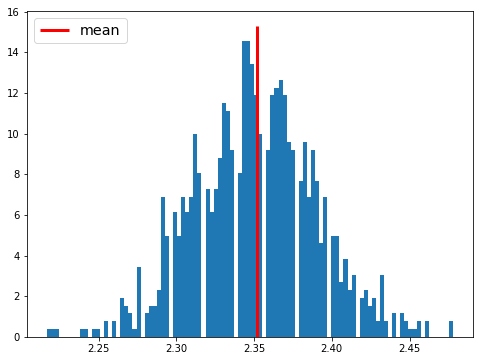

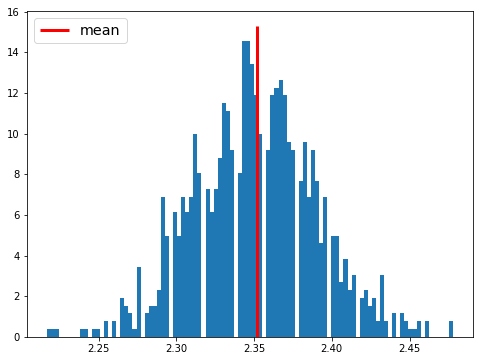

In [29]:
# probably really want a kernel density estimator here
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(means, bins=100, normed=True);
ylim = ax.get_ylim()
line = ax.vlines(overall_mean, ylim[0], ylim[1], lw=3, color='r', label="mean")
#ax.vlines(median, ylim[0], ylim[1], lw=1, color='orange', label="median", alpha=.5)
leg = ax.legend([line], [line.get_label()], loc="upper left", fontsize="x-large")
plt.show()